# Handling Correlations in Feature Variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1]:
!pip install yellowbrick

     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
     ---- -------------------------------- 30.7/282.6 kB 435.7 kB/s eta 0:00:01
     ---- -------------------------------- 30.7/282.6 kB 435.7 kB/s eta 0:00:01
     -------- ---------------------------- 61.4/282.6 kB 297.7 kB/s eta 0:00:01
     ------------ ------------------------ 92.2/282.6 kB 375.8 kB/s eta 0:00:01
     ------------ ------------------------ 92.2/282.6 kB 375.8 kB/s eta 0:00:01
     -------------- --------------------- 112.6/282.6 kB 344.8 kB/s eta 0:00:01
     ------------------------ ----------- 194.6/282.6 kB 491.5 kB/s eta 0:00:01
     ---------------------------- ------- 225.3/282.6 kB 529.7 kB/s eta 0:00:01
     ---------------------------- ------- 225.3/282.6 kB 529.7 kB/s eta 0:00:01
     -------------------------------- --- 256.0/282.6 kB 491.5 kB/s eta 0:00:01
     -----------------------------------  276.5/282.6


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
diabetes = pd.read_csv('diabetes.csv')

diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.000000,35,155.548223,33.6,0.627,50,1
1,1,85,66.000000,29,155.548223,0.0,0.351,31,0
2,8,183,64.000000,32,155.548223,23.3,0.672,32,1
3,1,0,66.000000,23,0.000000,28.1,0.167,21,0
4,0,137,0.000000,0,168.000000,43.1,2.288,33,1
5,5,116,74.000000,32,155.548223,25.6,0.201,30,0
6,3,78,50.000000,32,88.000000,31.0,0.248,26,1
7,10,115,72.405184,32,155.548223,35.3,0.134,29,0
8,2,197,70.000000,45,543.000000,30.5,0.158,53,1
9,8,125,96.000000,32,155.548223,32.0,0.232,54,1


### Calculating correlation matrix

In [3]:
diabetes_corr = diabetes.corr()

diabetes_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.116312,0.212336,0.102609,0.048576,0.017144,-0.033244,0.541351,0.217530
Glucose,0.116312,1.000000,0.193321,0.185110,0.417379,0.212689,0.143627,0.264934,0.477650
BloodPressure,0.212336,0.193321,1.000000,0.217839,0.066496,0.235255,-0.024798,0.306110,0.141327
SkinThickness,0.102609,0.185110,0.217839,1.000000,0.160939,0.475132,0.049718,0.150070,0.214009
Insulin,0.048576,0.417379,0.066496,0.160939,1.000000,0.163018,0.101485,0.132041,0.212644
BMI,0.017144,0.212689,0.235255,0.475132,0.163018,1.000000,0.148903,0.023503,0.299008
DiabetesPedigreeFunction,-0.033244,0.143627,-0.024798,0.049718,0.101485,0.148903,1.000000,0.033561,0.173844
Age,0.541351,0.264934,0.306110,0.150070,0.132041,0.023503,0.033561,1.000000,0.238356
Outcome,0.217530,0.477650,0.141327,0.214009,0.212644,0.299008,0.173844,0.238356,1.000000


<AxesSubplot:>

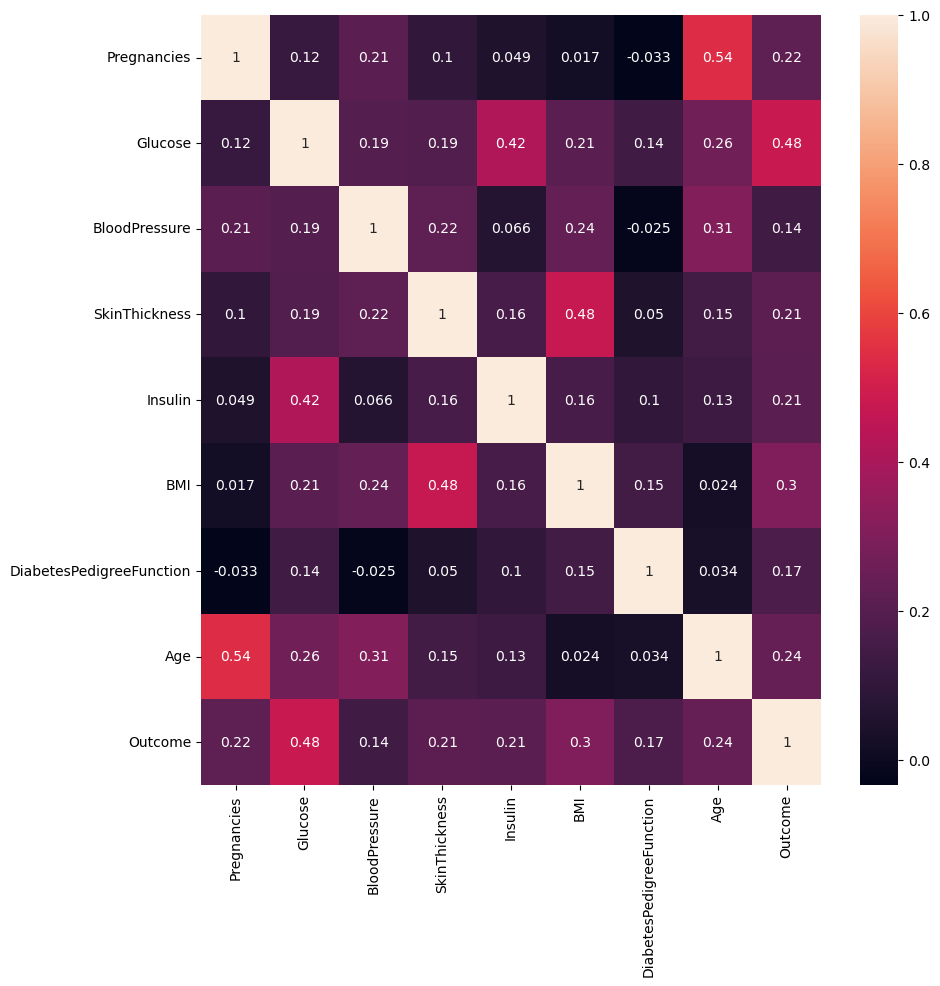

In [4]:
#Plotting HeatMap

plt.figure(figsize=(10, 10))
sns.heatmap(diabetes_corr, annot=True)

In the above matrix we can figure out that the correlation score is higher for `Insulin and BMI`. So now we are going to use Feature Correlation function to visualize how 'Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction' are correlated with 'Age'.

We are taking 4 columns `'Insulin'`, `'BMI'`, `'BloodPressure'`, `'DiabetesPedigreeFunction'` as features and `'Age'` as label.

In [6]:
X = diabetes[['Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction']]

Y = diabetes['Age']

In [7]:
feature_names = X.columns

feature_names

Index(['Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction'], dtype='object')

### Visualizing feature correlations
https://www.scikit-yb.org/en/latest/api/target/feature_correlation.html

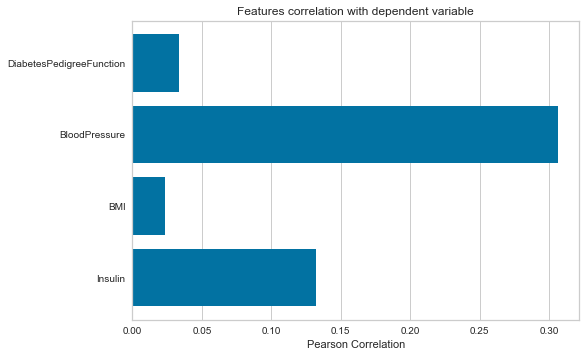

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [10]:
from yellowbrick.target import FeatureCorrelation

visualizer = FeatureCorrelation(labels=feature_names, method='pearson')  # Instantiate the visualizer
visualizer.fit(X, Y)   # Fit the data to the visualizer
visualizer.poof()      # Draw/show/poof the data

#### Showing the correlation score

In [11]:
visualizer.features_

array(['Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction'],
      dtype=object)

In [12]:
visualizer.scores_

array([0.13204145, 0.02350259, 0.3061102 , 0.03356131])

#### We can see that the scores are same as we got in above correlation matrix/heatmap

In [13]:
score_df = pd.DataFrame({'Feature_names' : visualizer.features_,
                         'Scores' : visualizer.scores_})

score_df

,Feature_names,Scores
0,Insulin,0.132041
1,BMI,0.023503
2,BloodPressure,0.306110
3,DiabetesPedigreeFunction,0.033561


### Split dataset into features and labels

In [13]:
X = diabetes.drop('Outcome', axis=1)

Y = diabetes['Outcome']

In [14]:
feature_names = X.columns

feature_names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

### Visualizing feature correlations

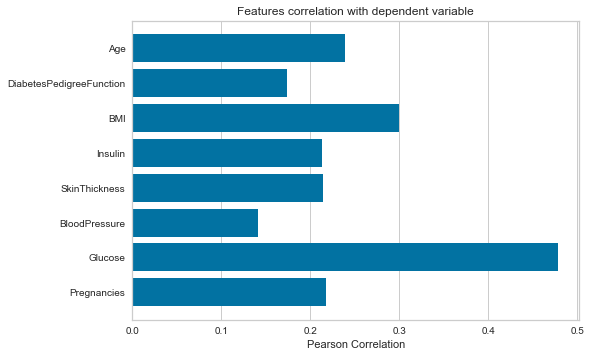

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [15]:
visualizer = FeatureCorrelation(labels=feature_names, method='pearson')
visualizer.fit(X, Y)
visualizer.poof()

In [16]:
visualizer.features_

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [18]:
visualizer.scores_

array([0.21753009, 0.47765041, 0.14132739, 0.21400854, 0.21264367,
       0.29900819, 0.17384407, 0.23835598])

In [19]:
score_df = pd.DataFrame({'Feature_names' : visualizer.features_,
                         'Scores' : visualizer.scores_})

score_df

,Feature_names,Scores
0,Pregnancies,0.217530
1,Glucose,0.477650
2,BloodPressure,0.141327
3,SkinThickness,0.214009
4,Insulin,0.212644
5,BMI,0.299008
6,DiabetesPedigreeFunction,0.173844
7,Age,0.238356


In [20]:
feature_names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

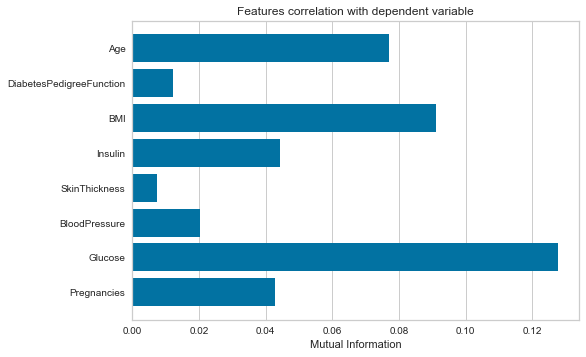

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Mutual Information'>

In [21]:
# Try another method for the visualizer
discrete_features = [False for _ in range(len(feature_names))]
discrete_features[0] = True

visualizer = FeatureCorrelation(method='mutual_info-classification',
                                labels=feature_names)

visualizer.fit(X, Y, discrete_features=discrete_features, random_state=0)

visualizer.poof()

In [22]:
score_df = pd.DataFrame({'Feature_names' : visualizer.features_,
                         'Scores' : visualizer.scores_})

score_df

,Feature_names,Scores
0,Pregnancies,0.042904
1,Glucose,0.127594
2,BloodPressure,0.020407
3,SkinThickness,0.007263
4,Insulin,0.044190
5,BMI,0.091209
6,DiabetesPedigreeFunction,0.012049
7,Age,0.076876


#### This time we are selecting for which feature we want the feature correlation plot

In [23]:
# Make your choice of columns for the visualizer
feature_to_plot = ['Age', 'BMI', 'Insulin', 'BloodPressure', 'Glucose']

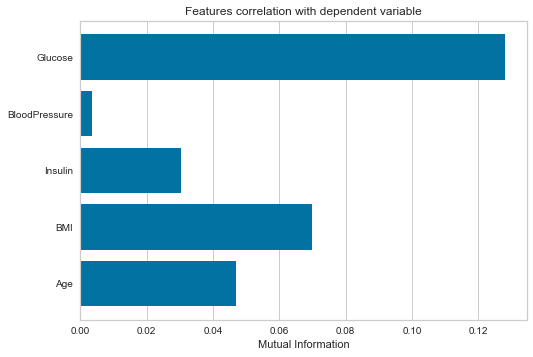

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Mutual Information'>

In [24]:
visualizer = FeatureCorrelation(method='mutual_info-classification',
                                feature_names=feature_to_plot)

visualizer.fit(X, Y, random_state=0)

visualizer.poof()

#### Here we want features in sorted form

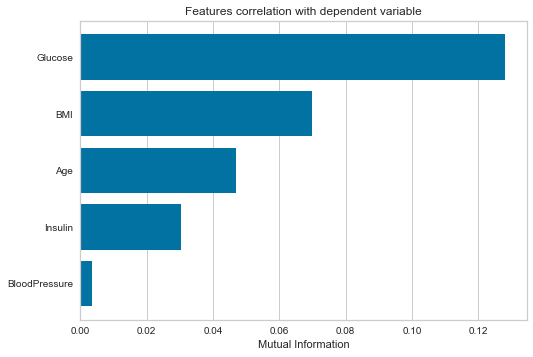

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Mutual Information'>

In [25]:
visualizer = FeatureCorrelation(method='mutual_info-classification',
                                feature_names=feature_to_plot, sort=True)

visualizer.fit(X, Y, random_state=0)
visualizer.poof()

In [26]:
score_df = pd.DataFrame({'Feature_names' : visualizer.features_,
                         'Scores' : visualizer.scores_})

score_df

,Feature_names,Scores
0,BloodPressure,0.003432
1,Insulin,0.030271
2,Age,0.046833
3,BMI,0.069942
4,Glucose,0.128194


# Handling Multicollinearity


In [5]:
automobile = pd.read_csv('cars_processed.csv')

automobile.head(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,8,307.0,130,3504,12.0,US,51
1,16.000000,8,304.0,150,3433,12.0,US,51
2,17.000000,8,302.0,140,3449,10.5,US,51
3,14.000000,8,454.0,220,4354,9.0,US,51
4,23.551429,8,440.0,215,4312,8.5,US,51


In [6]:
automobile.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,23.672514,5.410853,192.184755,103.645995,2965.387597,15.573643,44.917313
std,7.736579,1.667795,103.703706,38.128651,846.332848,2.746260,3.668715
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,39.000000
25%,17.600000,4.000000,102.500000,75.000000,2221.500000,13.900000,42.000000
50%,23.200000,4.000000,146.000000,92.000000,2790.000000,15.500000,45.000000
75%,29.000000,6.000000,260.000000,121.000000,3589.500000,17.050000,48.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,51.000000


#### Preprocessing the features

In [7]:
from sklearn import preprocessing

automobile[['Cylinders']] = preprocessing.scale(automobile[['Cylinders']].astype('float64'))
automobile[['Displacement']] = preprocessing.scale(automobile[['Displacement']].astype('float64'))
automobile[['Horsepower']] = preprocessing.scale(automobile[['Horsepower']].astype('float64'))
automobile[['Weight']] = preprocessing.scale(automobile[['Weight']].astype('float64'))
automobile[['Acceleration']] = preprocessing.scale(automobile[['Acceleration']].astype('float64'))
automobile[['Age']] = preprocessing.scale(automobile[['Age']].astype('float64'))

In [9]:
automobile.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
count,387.000000,3.870000e+02,3.870000e+02,3.870000e+02,3.870000e+02,3.870000e+02,3.870000e+02
mean,23.672514,1.095879e-16,8.778508e-17,-1.061454e-17,-2.008155e-18,2.662240e-16,5.817913e-16
std,7.736579,1.001294e+00,1.001294e+00,1.001294e+00,1.001294e+00,1.001294e+00,1.001294e+00
min,9.000000,-1.447404e+00,-1.199046e+00,-1.513838e+00,-1.600007e+00,-2.761372e+00,-1.615000e+00
25%,17.600000,-8.470340e-01,-8.659368e-01,-7.522710e-01,-8.800918e-01,-6.102152e-01,-7.962160e-01
50%,23.200000,-8.470340e-01,-4.459295e-01,-3.058349e-01,-2.075007e-01,-2.685060e-02,2.256768e-02
75%,29.000000,3.537065e-01,6.547792e-01,4.557326e-01,7.383860e-01,5.382839e-01,8.413513e-01
max,46.600000,1.554447e+00,2.537570e+00,3.318176e+00,2.572779e+00,3.363956e+00,1.660135e+00


In [10]:
automobile.shape

(387, 8)

### Building a regression model

In [11]:
automobile.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,1.554447,1.108580,0.692081,0.637231,-1.302961,US,1.660135
1,16.000000,1.554447,1.079614,1.217300,0.553231,-1.302961,US,1.660135
2,17.000000,1.554447,1.060303,0.954691,0.572161,-1.849865,US,1.660135
3,14.000000,1.554447,2.527915,3.055566,1.642864,-2.396769,US,1.660135
4,23.551429,1.554447,2.392740,2.924262,1.593174,-2.579071,US,1.660135


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = automobile.drop(['MPG', 'Origin'], axis=1)
Y = automobile['MPG']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [14]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [16]:
print("Training_score : " , linear_model.score(x_train, y_train))

Training_score :  0.7831423990108983


In [17]:
y_pred = linear_model.predict(x_test)

In [19]:
from sklearn.metrics import r2_score

print("Testing_score : ", r2_score(y_test, y_pred))

Testing_score :  0.7974391361823617


##### Calculating the adjusted r_2 value

In [20]:
def adjusted_r2(r_square, labels, features):
    
    adj_r_square = 1 - ((1 - r_square) * (len(labels) - 1)) / (len(labels) - features.shape[1] - 1)
    
    return adj_r_square

In [21]:
print("Adjusted_r2_score : ", adjusted_r2(r2_score(y_test, y_pred), y_test, x_test))

Adjusted_r2_score :  0.7803213167048149


### Showing correlation matrix for multicollinearity detection
Higher the correlation value means features are highly correlated

In [22]:
features_corr = X.corr()

features_corr

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
Cylinders,1.000000,0.922633,0.811466,0.873029,-0.458161,0.321850
Displacement,0.922633,1.000000,0.894199,0.932822,-0.526901,0.357047
Horsepower,0.811466,0.894199,1.000000,0.863388,-0.670920,0.404458
Weight,0.873029,0.932822,0.863388,1.000000,-0.397181,0.299049
Acceleration,-0.458161,-0.526901,-0.670920,-0.397181,1.000000,-0.292705
Age,0.321850,0.357047,0.404458,0.299049,-0.292705,1.000000


#### Checking for correlation value greater than 0.8
Here we can figure out that cylinders, displacement, horsepower and weight are correlated

In [23]:
abs(features_corr) > 0.8

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
Cylinders,True,True,True,True,False,False
Displacement,True,True,True,True,False,False
Horsepower,True,True,True,True,False,False
Weight,True,True,True,True,False,False
Acceleration,False,False,False,False,True,False
Age,False,False,False,False,False,True


#### So we are dropping 'cylinders', 'displacement', 'weight' columns

In [24]:
trimmed_features_df = X.drop(['Cylinders', 'Displacement', 'Weight'], axis=1)

In [25]:
#### After dropping the columns we can see now correlation value is less than 0.75 

trimmed_features_corr = trimmed_features_df.corr()

trimmed_features_corr

,Horsepower,Acceleration,Age
Horsepower,1.000000,-0.670920,0.404458
Acceleration,-0.670920,1.000000,-0.292705
Age,0.404458,-0.292705,1.000000


In [26]:
abs(trimmed_features_corr) > 0.8

,Horsepower,Acceleration,Age
Horsepower,True,False,False
Acceleration,False,True,False
Age,False,False,True


### Calculating VIF score for multicollinearity detection
* 1 = not correlated.
* Between 1 and 5 = moderately correlated.
* Greater than 5 = highly correlated

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [29]:
vif["features"] = X.columns

In [30]:
vif.round(2)

,VIF Factor,features
0,6.84,Cylinders
1,16.10,Displacement
2,8.82,Horsepower
3,10.69,Weight
4,2.49,Acceleration
5,1.22,Age


#### Dropping top 4 highest VIF factor column

In [31]:
X = X.drop(['Displacement', 'Weight'], axis=1)

In [32]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [33]:
vif["features"] = X.columns

In [34]:
vif.round(2)

,VIF Factor,features
0,3.05,Cylinders
1,4.56,Horsepower
2,1.90,Acceleration
3,1.20,Age


#### Here we are dropping that features which are causing multicollinearity and then training the model
Here we can see the difference between training, testing and adjusted r2 scores between the models that we build in the starting of the demo and this model.

In [35]:
X = automobile.drop(['MPG', 'Displacement', 'Weight', 'Origin'], axis=1)
Y = automobile['MPG']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [36]:
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [37]:
print("Training_score : " , linear_model.score(x_train, y_train))

Training_score :  0.7227807439384513


In [38]:
y_pred = linear_model.predict(x_test)

In [39]:
print("Testing_score : ", r2_score(y_test, y_pred))

Testing_score :  0.7338973841663119


In [40]:
print("Adjusted_r2_score : ", adjusted_r2(r2_score(y_test, y_pred), y_test, x_test))

Adjusted_r2_score :  0.7193164189151509
